This model of SVM trains on the Iris dataset and used to detect the Vriginica flowers.

In [21]:
# imports
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [25]:
import matplotlib.pyplot as plt

In [4]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
X = iris['data'][:, (2,3)]
y = (iris['target'] == 2).astype(np.float64)

In [11]:
svm_clf = Pipeline([
                    ('Scaling', StandardScaler()),
                    ('Linear_svc', LinearSVC(C=1, loss='hinge')),
])

In [12]:
svm_clf.fit(X,y)

Pipeline(steps=[('Scaling', StandardScaler()),
                ('Linear_svc', LinearSVC(C=1, loss='hinge'))])

In [13]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

# Non-Linear SVM Classifications

One approach to handleing the nonlinear datatsets is to add more features, such as polynomial features.
Lets test this approach using the makemoons function from sklearn.
Its a toy dataset for binary classification in which the datapoints are shaped as two interleaving half circles.

In [15]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [18]:
X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
                                ('polynomial_features', PolynomialFeatures(degree=3)),
                                ('scaler', StandardScaler()),
                                ('svm_clf', LinearSVC(C=10, loss='hinge',max_iter=1000))
                                
])

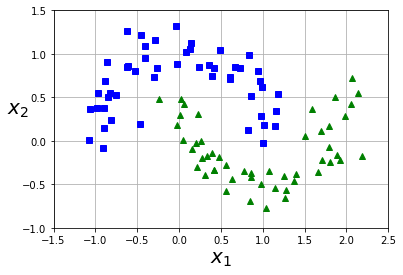

In [29]:
def plot_dataset(X,y, axes):
    plt.plot(X[:, 0][y==0], X[:,1][y==0],"bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()


In [19]:
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])